In [2]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

# define model and load weights
output_dir='/home/ricardo/master_thesis/diffusion-models_master/results/mammo_vanilla-prompt'
pipe = StableDiffusionPipeline.from_pretrained(output_dir, safety_checker=None, torch_dtype=torch.float16).to("cuda")
generator = torch.Generator(device='cuda')
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()

/home/ricardo/miniconda3/envs/dreambooth/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricardo/miniconda3/envs/dreambooth/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all publi

In [3]:
def show_row(imgs, figsize=(10, 10), title="", **kwargs):
    fig, axs = plt.subplots(1, len(imgs), figsize=figsize)
    fig.suptitle(title)
    for i, img in enumerate(imgs):
        axs[i].imshow(img, **kwargs)
        axs[i].axis("off")
    fig.tight_layout()

 38%|███▊      | 9/24 [00:07<00:13,  1.15it/s]


KeyboardInterrupt: 

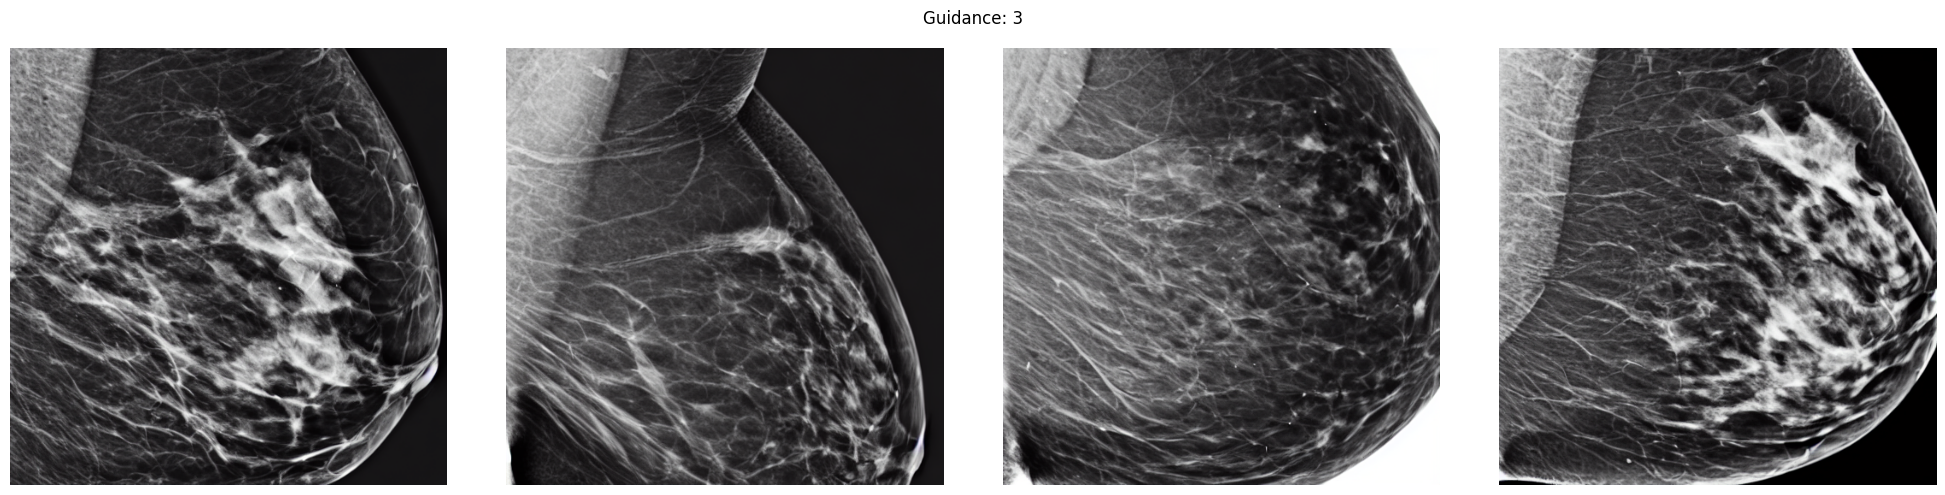

In [4]:
# Param
for prompt in ["a mammogram, black background"]:
    for guidance_scale in range(3,16):
        # Seed
        seed = 1
        generator.manual_seed(seed)
        negative_prompt = ""
        num_samples = 4
        num_inference_steps = 24
        size = 512
        with torch.autocast("cuda"), torch.inference_mode():
            image = pipe(
                prompt=prompt,
                negative_prompt=negative_prompt,
                num_images_per_prompt=num_samples,
                num_inference_steps=num_inference_steps,
                guidance_scale=guidance_scale,
                height=size,
                width=size,
                generator=generator,
            ).images
        # images in list
        imgs = [np.asarray(img) for img in image]
        # save first image as png
        #cv.imwrite(f'inference_images/{prompt}.png', imgs[2])

        show_row(imgs, title=f'Guidance: {guidance_scale}', figsize=(20,5), cmap="gray") if len(imgs) > 1 else plt.imshow(imgs[0], cmap="gray")